# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
#Reading dataset and display the first 5 rows
data = pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Data statistics

In [3]:
#Performing summary statistics
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The data exhibits significant variation in magnitude. Variables such as Channel and Region have low magnitudes, while variables like Fresh, Milk, and Grocery have higher magnitudes. This disparity poses a problem for K-Means, a distance-based algorithm, due to its sensitivity to these magnitude differences.

# Data Normalization/standardization

In [4]:
# Normalize all the variables to the same magnitude.
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

#summary statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


# kmeans 

In [5]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = 2, init = 'k-means++')

#fitting k-means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

We have initialized two clusters using the k-means++ method, which is not random and typically yields better results. Next, we will evaluate the quality of the formed clusters by calculating their inertia

In [6]:
# inertia on the fitted data
kmeans.inertia_

2599.3873849123083


We obtained an inertia value of approximately 2600. Now, use the elbow method to determine the optimal number of clusters.

1. Fit multiple k-means models, increasing the number of clusters in each successive model.
2. Store the inertia value of each model.
3. Plot the inertia values to visualize the results.

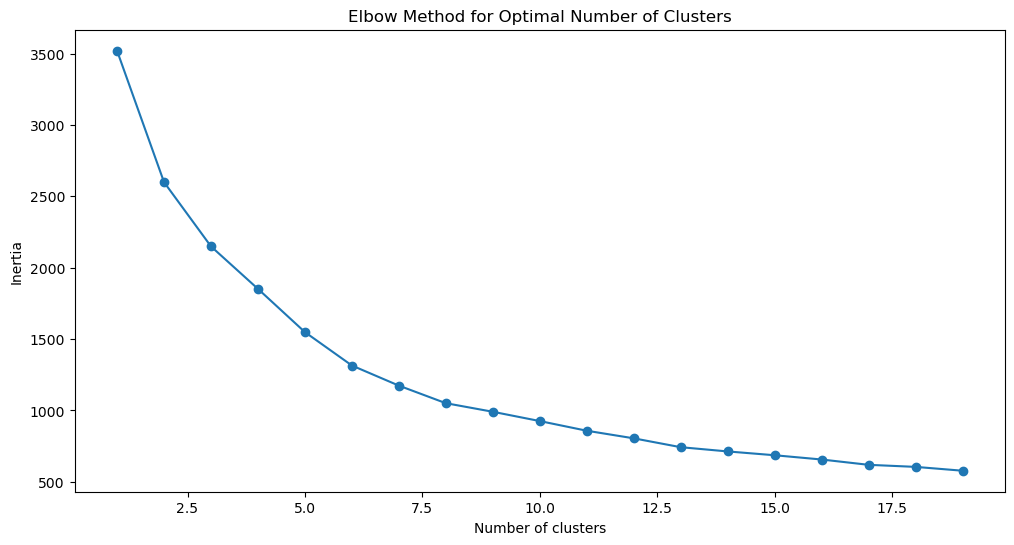

In [7]:
# Fitting multiple k-means algorithms and storing the inertia values in a list
inertia_values = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster': range(1, 20), 'Inertia': inertia_values})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

From the above elbow curve, we can choose any number of clusters between 5 to 8

In [8]:
## k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [9]:
#Value count of points in each of the above-formed clusters
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
1    174
3    125
4     86
0     44
2     10
5      1
Name: count, dtype: int64

So, there are 174 data points belonging to cluster 2 (index 1), 125 points in cluster 4 (index 3), 86 points in cluster 5 (index 4), 44 points in cluster 1 (index 0), 10 points in cluster 3 (index 2), and 1 point in cluster 6 (index 5)